## Predicting Hockey Wins With a Neural Network

Load in the necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPClassifier





data = pd.read_csv('complete_dataset_with_historical_data.csv')
data

,Unnamed: 0,index,game_id,settled_in,season,date_time,date_time_GMT,outcome,home_rink_side_start,venue,...,home_avg_giveaways,away_avg_giveaways,home_avg_takeaways,away_avg_takeaways,home_goal_differential,away_goal_differential,home_win_streak,away_win_streak,home_lose_streak,away_lose_streak
0,0,0,2010020003,REG,20102011,10/7/2010,20101007T160000+0000,away win REG,right,Hartwall Areena,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2010020002,REG,20102011,10/7/2010,20101007T230000+0000,away win REG,left,CONSOL Energy Center,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2010020001,REG,20102011,10/7/2010,20101007T230000+0000,home win REG,right,Air Canada Centre,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,2010020010,REG,20102011,10/8/2010,20101008T233000+0000,away win REG,left,Scotiabank Place,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,2010020006,REG,20102011,10/8/2010,20101008T190000+0000,away win REG,left,Ericsson Globe,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11421,1352,11429,2018030413,REG,20182019,6/2/2019,20190602T000000+0000,away win REG,left,Enterprise Center,...,8.922330,8.485149,7.737864,7.613861,32.0,69.0,1.0,0.0,1.0,0.0
11422,1353,11430,2018030414,REG,20182019,6/4/2019,20190604T000000+0000,home win REG,left,Enterprise Center,...,8.903846,8.441176,7.769231,7.647059,27.0,74.0,0.0,1.0,0.0,1.0
11423,1354,11431,2018030415,REG,20182019,6/7/2019,20190607T000000+0000,away win REG,left,TD Garden,...,8.417476,8.904762,7.660194,7.838095,72.0,29.0,0.0,1.0,0.0,1.0
11424,1355,11432,2018030416,REG,20182019,6/10/2019,20190610T000000+0000,away win REG,left,Enterprise Center,...,8.886792,8.375000,7.839623,7.692308,30.0,71.0,2.0,0.0,2.0,0.0


Modify down the data

In [31]:
wins = data[data['home_won'] == 1][0:1000]
losses = data[data['home_won'] == 0][0:1000]
##equal wins/losses so there is no false accuracy boost from more wins
modelData = pd.concat([wins,losses])


##model features
params = ['home_goals_so_far', 'home_goals_against_so_far','home_goal_differential', 'home_win_streak','home_lose_streak','home_w_l_ratio','home_pim_so_far',
          'away_goals_so_far', 'away_goals_against_so_far','away_goal_differential','away_win_streak','away_lose_streak','away_w_l_ratio']


X = modelData[params]
y = modelData['home_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)




modelData

,Unnamed: 0,index,game_id,settled_in,season,date_time,date_time_GMT,outcome,home_rink_side_start,venue,...,home_avg_giveaways,away_avg_giveaways,home_avg_takeaways,away_avg_takeaways,home_goal_differential,away_goal_differential,home_win_streak,away_win_streak,home_lose_streak,away_lose_streak
4,4,4,2010020006,REG,20102011,10/8/2010,20101008T190000+0000,away win REG,left,Ericsson Globe,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,6,6,2010020009,SO,20102011,10/8/2010,20101008T233000+0000,home win REG,right,Joe Louis Arena,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,7,7,2010020007,REG,20102011,10/8/2010,20101008T230000+0000,away win OT,left,Prudential Center,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,2010020004,SO,20102011,10/8/2010,20101008T020000+0000,home win OT,right,Pepsi Center,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,9,9,2010020008,REG,20102011,10/8/2010,20101008T160000+0000,home win SO,right,Hartwall Areena,...,13.000000,17.000000,3.000000,8.000000,1.0,-1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,905,2225,2011020899,SO,20112012,2/24/2012,20120224T000000+0000,away win REG,right,Air Canada Centre,...,8.983333,10.086207,9.416667,5.844828,-3.0,22.0,0.0,1.0,0.0,1.0
2226,907,2227,2011020914,OT,20112012,2/25/2012,20120225T180000+0000,home win REG,left,CONSOL Energy Center,...,10.550000,10.050000,7.333333,7.300000,26.0,-32.0,0.0,0.0,0.0,0.0
2227,908,2228,2011020911,REG,20112012,2/25/2012,20120225T000000+0000,away win REG,left,Nationwide Arena,...,10.200000,9.786885,7.216667,8.213115,-56.0,-14.0,0.0,2.0,0.0,2.0
2232,913,2233,2011020916,REG,20112012,2/25/2012,20120225T210000+0000,away win REG,left,Rexall Place,...,9.566667,10.147541,6.083333,7.606557,-17.0,7.0,0.0,0.0,0.0,0.0


Show the Data

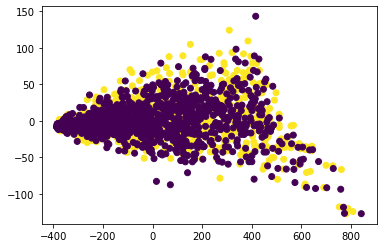

In [32]:
pca = PCA(n_components=2)
plt.scatter(pca.fit_transform(X)[:,0],pca.fit_transform(X)[:,1], c= y)

# Neural Network

In [33]:
clf = MLPClassifier(solver='adam',activation='logistic',
                    hidden_layer_sizes=(1000,100),batch_size=32,
                   learning_rate='invscaling',learning_rate_init=.00001)
##logistic activation refers to sigmoid activation function
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))



0.57


Confusion Matrix

In [34]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_frame = pd.DataFrame(data = conf_mat)
conf_mat_frame

,0,1
0,152,94
1,121,133


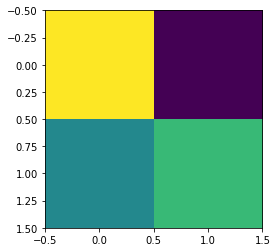

In [35]:
plt.imshow(conf_mat)

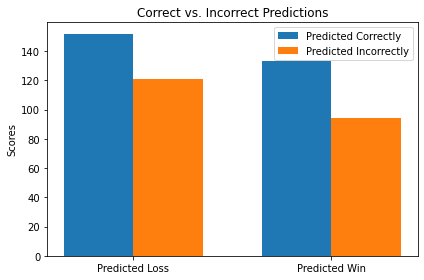

In [36]:
def graphSetup(dataframe):
    labels = ['Predicted Loss', 'Predicted Win']
    losses = [dataframe.iloc[0,0], dataframe.iloc[1,1]]
    wins = [dataframe.iloc[1,0], dataframe.iloc[0,1]]

    x = np.arange(len(labels))
    width = 0.35 

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, losses, width, label='Predicted Correctly')
    rects2 = ax.bar(x + width/2, wins, width, label='Predicted Incorrectly')

    ax.set_ylabel('Scores')
    ax.set_title('Correct vs. Incorrect Predictions')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()


graphSetup(conf_mat_frame)

# Random Forest

In [9]:
params = ['home_goals_so_far', 'home_goals_against_so_far','home_goal_differential', 'home_win_streak','home_lose_streak','home_w_l_ratio','home_pim_so_far',
          'away_goals_so_far', 'away_goals_against_so_far','away_goal_differential','away_win_streak','away_lose_streak','away_w_l_ratio', 'away_pim_so_far']
X = modelData[params]
y = modelData['home_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [12]:
model_forest = RandomForestClassifier(n_estimators = 150)
model_forest.fit(X_train, y_train.values.ravel())
y_pred_forest = model_forest.predict(X_test)
print(accuracy_score(y_test, y_pred_forest))

0.55


In [18]:
conf_mat_forest = confusion_matrix(y_test, y_pred_forest)
conf_mat_frame_forest = pd.DataFrame(data = conf_mat_forest)
conf_mat_frame_forest

,0,1
0,134,112
1,113,141


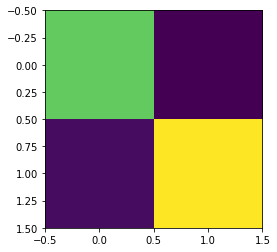

In [19]:
plt.imshow(conf_mat_forest)

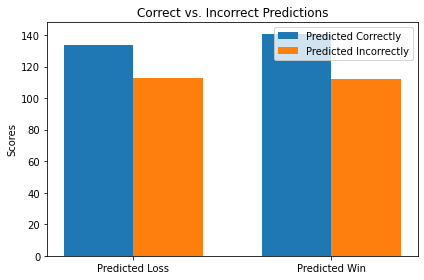

In [20]:
graphSetup(conf_mat_frame_forest)